#### Read a jpeg image and print the image file

In [1]:
from IPython.display import Image 

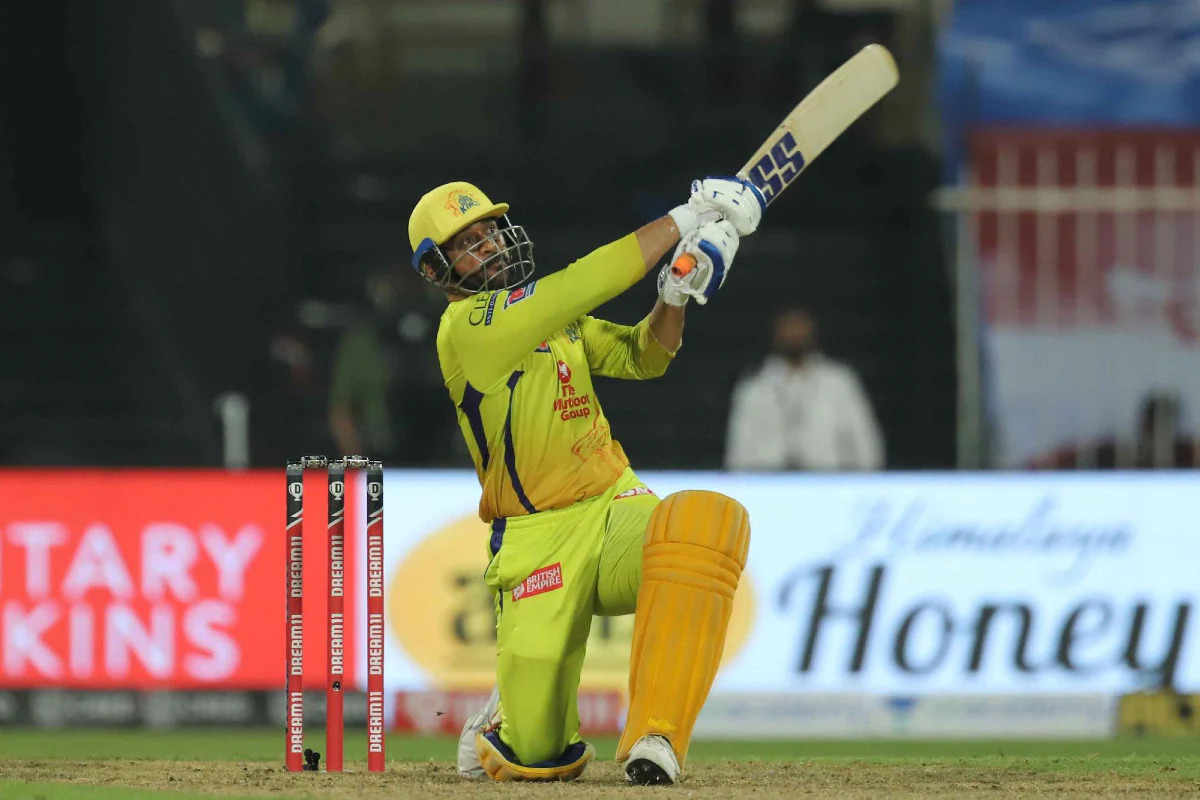

In [4]:
Image(filename='msd.jpg')

#### Merge two pdf files using python script

In [5]:
import PyPDF2

In [6]:
file1 = open('hello.pdf', 'rb')
file2 = open('world.pdf', 'rb')
 
Reader1 = PyPDF2.PdfFileReader(file1)
Reader2 = PyPDF2.PdfFileReader(file2)

pdfWriter = PyPDF2.PdfFileWriter()
 

for pageNum in range(Reader1.numPages):
    pageObj = Reader1.getPage(pageNum)
    pdfWriter.addPage(pageObj)

for pageNum in range(Reader2.numPages):
    pageObj = Reader2.getPage(pageNum)
    pdfWriter.addPage(pageObj)
 

OutputFile = open('Helloworld.pdf', 'wb')
pdfWriter.write(OutputFile)

In [7]:
OutputFile.close()
file1.close()
file2.close()

#### Scrape a website and store the data into DB.

In [2]:
import requests
import mysql.connector
from bs4 import BeautifulSoup

In [10]:
URL = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_1_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_1_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=bebe2452-555c-4c40-87f1-b1458fd01ecd&as-searchtext=l&p%5B%5D=facets.rating%255B%255D%3D3%25E2%2598%2585%2B%2526%2Babove"
page = requests.get(URL)

In [11]:
soup = BeautifulSoup(page.content, "html.parser")
soup.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>\n  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.3e7df7.css" rel="stylesheet"/>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>\n  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>\n  <meta content="102988293558" property="fb:page_id"/>\n  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>\n  <meta content="noodp" name="robots"/>\n  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>\n  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>\n  <meta content="website" property="og:type"/>\n  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>\n  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>\n  <link href="/apple-touch-icon-72x72.png

In [12]:
products=[]
prices=[]
ratings=[]

In [13]:
product=soup.find('div',attrs={'class':'_4rR01T'})

print(product.text)

acer Predator Helios 300 Octa Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graph...


In [14]:
for a in soup.findAll('a',href=True, attrs={'class':'_1fQZEK'}):
    
    name=a.find('div',attrs={'class':'_4rR01T'})
    price=a.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
    rating=a.find('div',attrs={'class':'_3LWZlK'})

    products.append(name.text)
    prices.append(price.text)
    ratings.append(rating.text)

In [18]:
con = mysql.connector.connect(host="localhost", user="root",passwd="Microsoft@9623",database="mydatabase")

In [19]:
dbase = con.cursor()

In [30]:
dbase.execute("CREATE TABLE Flipkart_Laptops (Model VARCHAR(255), Price VARCHAR(255), Rating VARCHAR(255))")

In [32]:
for pdt, price, rating in zip(products, prices, ratings):
    sql = "INSERT INTO Flipkart_Laptops (Model, Price, Rating) VALUES (%s,%s,%s)"
    data = [(pdt, price, rating)]
    dbase.executemany(sql, data)
    
con.commit()

In [34]:
dbase.execute("SELECT * FROM Flipkart_Laptops")

result = dbase.fetchall()

for data in result:
    print(data)

('acer Predator Helios 300 Octa Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graph...', '₹1,14,990', '4.5')
('acer Predator Core i7 10th Gen - (16 GB/1 TB SSD/Windows 10 Home/8 GB Graphics/NVIDIA GeForce RTX 3070...', '₹1,54,990', '4.2')
('HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 15s-GR0012AU Laptop', '₹41,990', '4.4')
('ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...', '₹60,990', '4.5')
('HP 15s Core i3 10th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 15s-du1064TU Laptop', '₹43,990', '4.3')
('Lenovo V Series Athlon Dual Core 3050U - (4 GB/1 TB HDD/Windows 10 Home) V-15 ADA Laptop', '₹25,990', '4.6')
('HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HDD/Windows 10 Home) 15s-GR0011AU Thin and Light Laptop', '₹36,490', '4.2')
('DELL Inspiron Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) Inspiron 7490 Thin and Light Laptop', '₹69,444', '3.3')
('Lenovo Lenovo V Athlon 

#### Write queries to filter the data in db

In [35]:
dbase.execute("SELECT * FROM Flipkart_Laptops WHERE Rating > 4.3")

result = dbase.fetchall()

In [36]:
for data in result:
    print(data)

('acer Predator Helios 300 Octa Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graph...', '₹1,14,990', '4.5')
('HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 15s-GR0012AU Laptop', '₹41,990', '4.4')
('ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...', '₹60,990', '4.5')
('Lenovo V Series Athlon Dual Core 3050U - (4 GB/1 TB HDD/Windows 10 Home) V-15 ADA Laptop', '₹25,990', '4.6')
('APPLE MacBook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A', '₹92,900', '4.7')
('HP Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 15s-FQ2075TU Thin and Light Laptop', '₹40,990', '4.4')
('HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501TU Thin and Light Laptop', '₹40,990', '4.4')
('DELL Inspiron 3501 Core i5 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) Inspiron 3501 Laptop', '₹57,165', '4.4')
('MSI Modern 14 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) M

In [37]:
con.close()